In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [19]:
ls

final_data.csv  README.md


In [0]:
data=pd.read_csv("final_data.csv", index_col=0)

In [30]:
data.head()

,review,rating
0,i would like give shout sf fire credit union n...,5
1,poor future commission merchant muddyouter spa...,3
2,they charge 25 courtesy fee go balance not fir...,1
3,i changed credit union i wanted support local ...,1
4,i used recommend sffire friend got several joi...,2


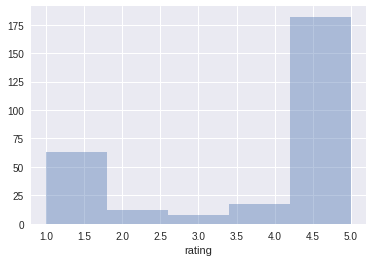

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data["rating"],kde=False)

In [0]:
X = data["review"]
Y = data["rating"]

In [0]:
import pandas as pd
Y_dummy = pd.get_dummies(data["rating"])

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_dummy,test_size=0.3)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


RNN
Define the RNN structure.

In [148]:
 
embedding_size=32
model=Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(5, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 505       
Total params: 110,905
Trainable params: 110,905
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [150]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10)

Epoch 1/10
197/197 [==============================] - 3s 15ms/step - loss: 0.4997 - acc: 0.8000
Epoch 2/10
197/197 [==============================] - 1s 4ms/step - loss: 0.4958 - acc: 0.8000
Epoch 3/10
197/197 [==============================] - 1s 4ms/step - loss: 0.4904 - acc: 0.8000
Epoch 4/10
197/197 [==============================] - 1s 4ms/step - loss: 0.4821 - acc: 0.8000
Epoch 5/10
197/197 [==============================] - 1s 4ms/step - loss: 0.4695 - acc: 0.8000
Epoch 6/10
197/197 [==============================] - 1s 4ms/step - loss: 0.4442 - acc: 0.8000
Epoch 7/10
197/197 [==============================] - 1s 4ms/step - loss: 0.3788 - acc: 0.8335
Epoch 8/10
197/197 [==============================] - 1s 4ms/step - loss: 0.3483 - acc: 0.8640
Epoch 9/10
197/197 [==============================] - 1s 4ms/step - loss: 0.3420 - acc: 0.8640
Epoch 10/10
197/197 [==============================] - 1s 4ms/step - loss: 0.3284 - acc: 0.8640


In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [152]:
accr = model.evaluate(test_sequences_matrix,Y_test)

85/85 [==============================] - 1s 12ms/step


In [153]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Test set
  Loss: 0.356
  Accuracy: 0.845
